Data preparation and Visualization : (Graded out of 100)
1.  You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained. [0-20]

2.      You must also rationalise justify and detail all the methods used to prepare the data for ML. [0-30]
3.      Appropriate visualizations must be used to engender insight into the dataset and to illustrate your final insights gained in your analysis. [0-20]
4.      All design and implementation of your visualizations must be justified and detailed in full., making reference to Tufts Principles [0-30]


In [1]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Importing the dataset

In [2]:
# Load migration data.csv file into dataframe (df)
df = pd.read_csv('Migration data.csv')

# Display first 5 records
df.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [3]:
df.tail(5) 

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
1993,Estimated Migration (Persons in April),2023,65 years and over,Male,Emigrants: All destinations,Thousand,0.4
1994,Estimated Migration (Persons in April),2023,65 years and over,Male,Immigrants: All origins,Thousand,1.5
1995,Estimated Migration (Persons in April),2023,65 years and over,Female,Net migration,Thousand,1.8
1996,Estimated Migration (Persons in April),2023,65 years and over,Female,Emigrants: All destinations,Thousand,0.6
1997,Estimated Migration (Persons in April),2023,65 years and over,Female,Immigrants: All origins,Thousand,2.5


In [26]:
df.dtypes

Year                       object
Age Group                  object
Sex                        object
Inward or Outward Flow     object
VALUE                     float64
VALUE_numeric             float64
dtype: object

In [25]:
##Transforming data types 

df['Year'] = df.Year.astype('object')


In [46]:
df3=df['Age_Group'] = df.Age_Group.astype('category')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 0 to 1997
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    1683 non-null   int64  
 1   Age Group               1683 non-null   object 
 2   Sex                     1683 non-null   object 
 3   Inward or Outward Flow  1683 non-null   object 
 4   VALUE                   1683 non-null   float64
 5   VALUE_numeric           1683 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 92.0+ KB


In [21]:
###Give information on non-categorical type columns
df.describe()

,Year,VALUE,VALUE_numeric
count,1683.000000,1683.000000,1683.000000
mean,2007.058824,10.856625,10.856625
std,10.247913,17.070445,17.070445
min,1987.000000,-43.900000,-43.900000
25%,1999.000000,1.200000,1.200000
50%,2008.000000,4.500000,4.500000
75%,2016.000000,14.000000,14.000000
max,2023.000000,151.100000,151.100000


In [28]:
###Will give info on the spread of data for the categorical columns 
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

##freq is the frequency of the top occuring variable

Index(['Year', 'Age Group', 'Sex', 'Inward or Outward Flow'], dtype='object')


,Year,Age Group,Sex,Inward or Outward Flow
count,1683,1683,1683,1683
unique,37,6,3,3
top,2005,0 - 14 years,Both sexes,Emigrants: All destinations
freq,54,288,591,636


In [5]:
df = df.drop(["STATISTIC Label"], axis=1)
df.head(5)

,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,1987,All ages,Male,Net migration,Thousand,NaN
4,1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [6]:
df = df.drop(["UNIT"], axis=1)

In [7]:
df.shape

(1998, 5)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 5)


In [9]:
df.count() 

Year                      1998
Age Group                 1998
Sex                       1998
Inward or Outward Flow    1998
VALUE                     1683
dtype: int64

In [10]:
print(df.isnull().sum())

Year                        0
Age Group                   0
Sex                         0
Inward or Outward Flow      0
VALUE                     315
dtype: int64


In [11]:
df = df.dropna() 
df.count()

Year                      1683
Age Group                 1683
Sex                       1683
Inward or Outward Flow    1683
VALUE                     1683
dtype: int64

In [51]:
import re
re.sub('\d+ \- (\d+) Year','\g<1>', '0 - 14 years')

'0 - 14 years'

In [56]:
print (df['Age_Group'].unique())

['All ages', '0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years', '65 years and over']
Categories (6, object): ['0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years', '65 years and over', 'All ages']


In [35]:
df = df.rename(columns={"Inward or Outward Flow": "FlowofPeople"})


In [12]:
df['VALUE_numeric'] = df.loc[:, 'VALUE']

<Axes: xlabel='Year'>

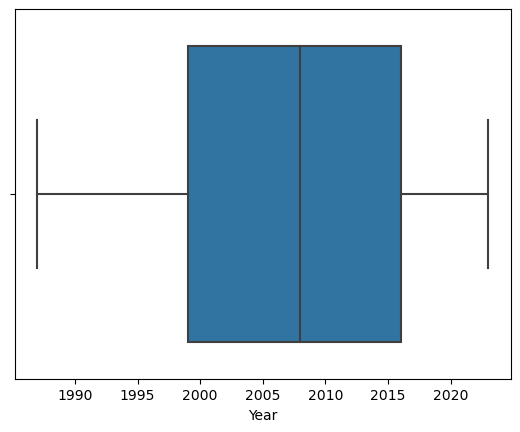

In [27]:
import seaborn as sns                       
sns.boxplot(x=df["Year"])

There seems to be a concentration of data in the years between the 1998 to 2018.

<Axes: xlabel='VALUE_numeric'>

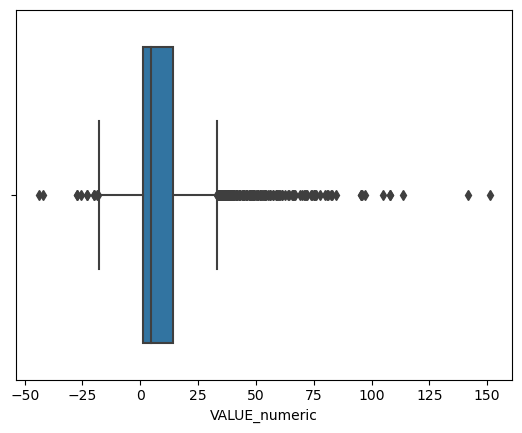

In [29]:
sns.boxplot(x=df["VALUE_numeric"]) #Seems to be some outliers

In [34]:
index = np.where(df["Year"] == max(df["Year"]) )

df.loc[index]

,Year,Age Group,Sex,Inward or Outward Flow,VALUE,VALUE_numeric
1629,2017,0 - 14 years,Both sexes,Net migration,4.4,4.4
1630,2017,0 - 14 years,Both sexes,Emigrants: All destinations,6.0,6.0
1631,2017,0 - 14 years,Both sexes,Immigrants: All origins,10.4,10.4
1632,2017,0 - 14 years,Male,Net migration,1.8,1.8
1633,2017,0 - 14 years,Male,Emigrants: All destinations,3.1,3.1
1634,2017,0 - 14 years,Male,Immigrants: All origins,4.9,4.9
1635,2017,0 - 14 years,Female,Net migration,2.7,2.7
1636,2017,0 - 14 years,Female,Emigrants: All destinations,2.9,2.9
1637,2017,0 - 14 years,Female,Immigrants: All origins,5.5,5.5
1638,2017,15 - 24 years,Both sexes,Net migration,4.6,4.6


In [47]:
ax = df3.query('Age_Group') \
    .groupby('Age_Group')['VALUE_numeric'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()
#####do the rest

AttributeError: 'Series' object has no attribute 'query'

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

In [ ]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] ###this will remove outliers

In [ ]:
df.shape

In [ ]:
df.FlowofPeople.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))###more people have left than people coming in

<Axes: >

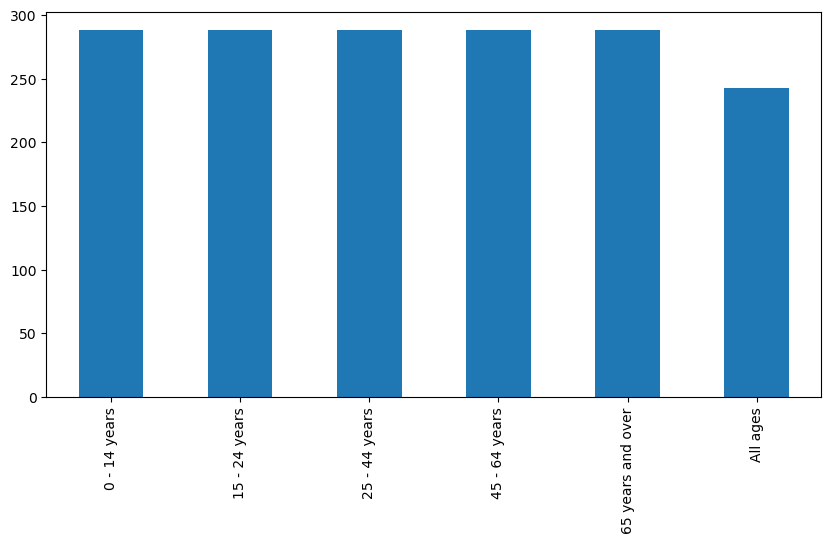

In [36]:
df = df.rename(columns={"Age Group": "Age_Group"})

df.Age_Group.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))

In [ ]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [ ]:
df2=df


In [ ]:
df2['VALUE_numeric'] = df.loc[:, 'VALUE']


In [ ]:
df2.head

In [ ]:
Filterflow = ['Emigrants: All destinations']

df2 = df[df['FlowofPeople'].isin(Filterflow)]
print(df2 )

In [ ]:
Filtersex = ['Male','Female']

df2 = df2[df2['Sex'].isin(Filtersex)]
print(df2)

In [ ]:
df2.shape
df2.head
print(df.isnull().sum())

# Machine learning part

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree

In [ ]:
dummy=pd.get_dummies(df2['VALUE'])

In [ ]:
##split data 

In [ ]:
###The value column is now Binary##
df2.loc[df2['VALUE'] < 1, 'VALUE'] = 0
df2.loc[df2['VALUE'] > 1, 'VALUE'] = 1

In [ ]:
###transform value in d2 to binary to use in tree model

In [ ]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(df2["Sex"])##this is what will be predicted 

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = df2["VALUE"])

In [ ]:
pip install graphviz

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 

In [52]:
# Get Emigration probability
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_sex))

pd.crosstab(preds[:,0], df2["VALUE"])


NameError: name 'tree_model' is not defined

In [ ]:
df2 = df2.rename(columns={"Age Group": "Age_Group"})

In [ ]:
df2["Age_Group"] = df2["Age_Group"].apply(lambda x: float(x.split()[0].replace('-', 'to')))

In [ ]:
df2['Age_Group'] = df2.Age_Group.astype('category')

In [ ]:
# Make data frame of predictors
predictors = pd.DataFrame([encoded_sex, df2["Age_Group"]]).T

# Train the model
tree_model.fit(X = predictors, 
               y = df2["VALUE"])

In [ ]:
female = preds[df2["Sex"] == "female"][0][1]
male = preds[df2["Sex"]=="male"][0][1]

print(female)
print(male)

# Statistics Part 